<h1>Задание 1 - часть 1 - Квадратик</h1>
Доделать начинания, что были на занятии:<br>
при помощи функции отображения графиков отобразить квадратик.<br>
Задав квадратик матрицей координат, повернуть и сдвинуть его относительно исходного положения.<br>
Вывести исходный квадратик и результат.


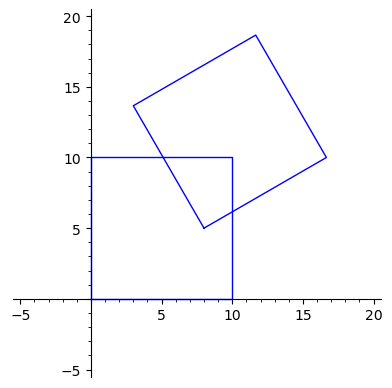

In [1]:
import math
a = 10
rectangle_src = matrix([[0,0], [0, a], [a, a], [a, 0], [0, 0]])
alpha = math.radians(30)
mat_rot = matrix([[cos(alpha), sin(alpha)],
           [-sin(alpha), cos(alpha)]])
#координаты на которые необходимо сдвинуть квадрат
deltaX = 8
deltaY = 5
# матрица "сдвига"
rect_shift = matrix([[deltaX,deltaY], [deltaX,deltaY], [deltaX,deltaY], [deltaX,deltaY], [deltaX,deltaY]])

rectangle_rotated = rectangle_src*mat_rot + rect_shift
show(
    line(rectangle_src) + line(rectangle_rotated),
    xmin=-5, xmax=20, ymin=-5, ymax=20, aspect_ratio=1)

<h1>Задание 1 - часть 2 - Исследование функции</h1>
Для заданной формулой функции найти:
<ol>
    <li>Область определения функции.</li>
    <li>Является ли функция четной или нечетной, является ли периодической.</li>
    <li>Точки пересечения графика с осями координат.</li>
    <li>Промежутки знакопостоянства.</li>
    <li>Промежутки возрастания и убывания.</li>
    <li>Точки экстремума и значения в этих точках.</li>
    <li>Непрерывность. Наличие точек разрыва и их классификация.</li>
    <li>Асимптоты.</li>
</ol>
Построить график функции, асимптоты, промежутки знакопостоянства. (см. папку с материалами).<br>
Необходимо также сделать минимальное, но оформление решения, а не просто набор ответов.

<h4>Справочные материалы:</h4>
<ol>
    <li>Гусак, 1999г. - исследование графиков</li>
    <li>Ефимов, Поспелов — т.2, стр. 86</li>
    <li>Ильин, Поздняк — т.1, стр. 143 и стр. 300-327</li>
    <li>Пискунов — стр. 144-184</li>
</ol>

<h2> График функции </h2>

'Функция: ' x |--> sin(2*x^3)^2/x^3

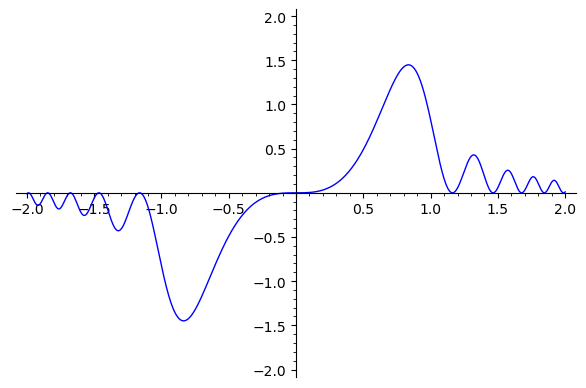

In [2]:
y(x) = sin(2*x**3)**2/x**3
show("Функция: ", y)
plot(y, (x, -2, 2), ymin=-2, ymax=2)

<h2>1. Область определения функции </h2>

Функция не определена только в точке $x = 0$, так как числитель не может быть равен $0$.

In [3]:
a = 0

<h2>2. Является ли функция четной или нечетной, является ли периодической. </h2>

Функция нечетная, если $y(-x) = -y(x)$, то есть $y(-x) + y(x) = 0$.

In [4]:
if((y(-x) + y(x)).simplify_full() == 0):
    show("Нечётная")

'Нечётная'

Функция не периодическая, так как при $x>0 \rightarrow y>0$, а при $x<0 \rightarrow y<0$. То есть значения функции при $x >0$ не могут повторяться со значениями при $x<0$.

<h2>3. Точки пересечения графика с осями координат.</h2>

Точки пересечения с осью $y$ не существуют, так как функция не определена в точке $x=0$.

Точки пересечения с осью $x$:

In [5]:
res = solve(y(x), x)
show("Res: ", res)

'Res: ' [x == 0]

Так как $x = 0$ не определена, то нет точек пересечения с осью $x$.

<h2>4. Промежутки знакопостоянства.</h2>

Функция нечётная и пересечение с осью $x$ только одно, значит необходимо определить значение в любой точке $x > 0$, знак при $x < 0$ будет другого знака. Так как $f(1) > 0$, то интервалы такие:

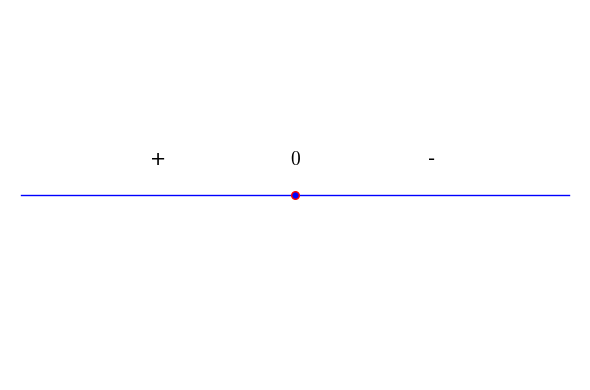

In [6]:
intervals_of_constancy = plot(0, xmin=-0.5, xmax=0.5, ymin=-0.5, ymax=0.5)

intervals_of_constancy  += point((a, 0), marker='o', markeredgecolor='red', size=30, zorder=10)
intervals_of_constancy  += text("$0$", (0, 0.1), color="black", fontsize=14)

y_margin = 0.1 
intervals_of_constancy  += text("-", (0.25 , y_margin), color="black", fontsize=14) 
intervals_of_constancy  += text("+", (-0.25 , y_margin), color="black", fontsize=14)

intervals_of_constancy.show(axes=False)

<h2>5. Промежутки возрастания и убывания.</h2>

Для того, чтобы определить промежутки возрастания и убывания, необходимо найти экстремумы функции, между которыми они находятся. Это можно сделать найдя корни $f'(x)=0$.

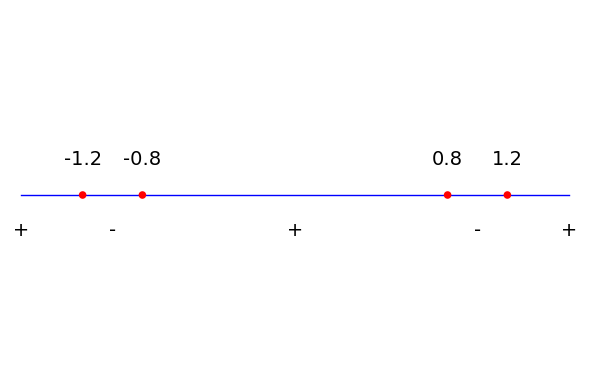

In [7]:
diffx = diff(y(x), x).simplify_full()
setofp = set()
for i in range(1,3):
    setofp.add(find_root(diffx, 0, 1 + i*0.5))
    setofp.add(find_root(diffx, -1 -i*0.5, 0))
    
listp = list()
for i in setofp:
    listp.append(i)
listp.sort()
intervals = plot(0, xmin=-1.5, xmax=1.5, ymin=-0.5, ymax=0.5)

sign = 1
if(y(listp[0] - 0.00001) > 0):
    sign = 0
y_margin2 = -0.1 
if(sign == 0):
    intervals  += text("-", (-1.5 , y_margin2), color="black", fontsize=14)
    sign = 1
elif(sign == 1):
    intervals  += text("+", (-1.5 , y_margin2), color="black", fontsize=14) 
    sign = 0

for i in range(len(listp)):
    intervals  += point((listp[i], 0), color='red', size=30, zorder=10)
    intervals  += text(round(listp[i],1), (listp[i], 0.1), color="black", fontsize=14)
    if(sign == 0 and i != len(listp) - 1):
        intervals  += text("-", ((listp[i] +listp[i+1])/2 , y_margin2), color="black", fontsize=14)
        sign = 1
    elif(sign == 1 and i != len(listp) - 1):
        intervals  += text("+", ((listp[i] +listp[i+1])/2 , y_margin2), color="black", fontsize=14) 
        sign = 0

if(sign == 0):
    intervals  += text("-", (1.5 , y_margin2), color="black", fontsize=14)
    sign = 1
elif(sign == 1):
    intervals  += text("+", (1.5 , y_margin2), color="black", fontsize=14) 
    sign = 0
intervals.show(axes=False)

<h2>6. Точки экстремума и значения в этих точках.</h2>

Так как мы нашли экстремумы для предыдущего задания, то используем их, чтобы найти значения в них.

In [8]:
for i in listp:
    show("X: ", round(i,2), " Y: ", round(y(i),2))

'X: ' -1.16 ' Y: ' -0.0

'X: ' -0.84 ' Y: ' -1.45

'X: ' 0.84 ' Y: ' 1.45

'X: ' 1.16 ' Y: ' 0.0

<h2>7. Непрерывность. Наличие точек разрыва и их классификация.</h2>

Если пределы к точке разрыва слева и справа равны, то эта точка называется устранимой точкой разрыва 1 рода.

In [9]:
if(lim(y(x), x = -a) == lim(y(x), x = +a)):
    show("Точка разрыва 1 рода, устранимая.")

'Точка разрыва 1 рода, устранимая.'

<h2>8. Асимптоты.</h2>

Вертикальная асимптота существует, если предел к точке разрыва слева или справа был равен бесконечности:

In [10]:
if not (lim(y(x), x=-a) == oo or lim(y(x), x=+a) == oo):
    show("Не существует вертикальной асимптоты")

'Не существует вертикальной асимптоты'

Наклонная асимптота существует, если $lim(y(x)/x), x\rightarrow \infty$ не равен $ \infty$ и $lim(y(x) - k*x), x \rightarrow  \infty$ не равен $ \infty$:

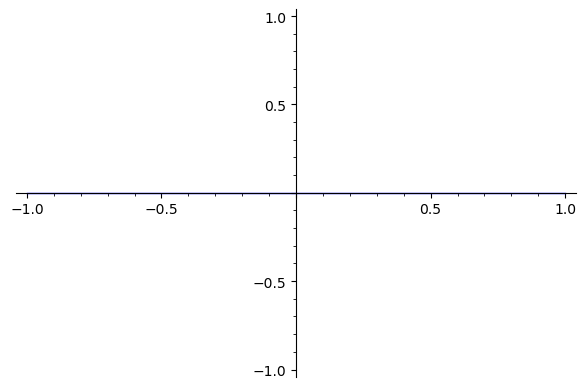

In [11]:
k = lim(y(x)/x, x = oo)
b = lim(y(x) - k*x, x = oo)
plot(k*x + b) # Асимптота